In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats

#                                        Bussiness Problem 1 

In [2]:
loan_data = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python hypothesis testing case study\4. Basic Statistics - Hypothesis Testing\LoansData.csv")
loan_data.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
cl =pd.Series(loan_data.columns)
cl.head(2)

0              Amount.Requested
1    Amount.Funded.By.Investors
dtype: object

In [4]:
clr = cl.str.replace('.','_')

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\514660276.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clr = cl.str.replace('.','_')


In [5]:
loan_data.columns = clr


In [6]:
loan_data.Interest_Rate = loan_data.Interest_Rate.str.replace('%','')

In [7]:
loan_data.Interest_Rate = loan_data.Interest_Rate.astype('float64')

## a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

### Null Hypothesis (H0) :
        Less interest is not charged for high loan amounts.
        
### Alternate Hypothesis(Ha) : 
        Less interest is charged for high loan amounts.
        
### CI & p values :
        CI =95%
        p value = 0.05
        
        
### Perform the test :
        correlation

In [8]:
loan_data.Amount_Funded_By_Investors = loan_data.Amount_Funded_By_Investors.fillna(loan_data.Amount_Funded_By_Investors.mean())

In [9]:
loan_data.Interest_Rate = loan_data.Interest_Rate.fillna(loan_data.Interest_Rate.mean())

In [10]:
stats.pearsonr(loan_data.Interest_Rate, loan_data.Amount_Funded_By_Investors)

PearsonRResult(statistic=0.33742660344157105, pvalue=1.2764840056932822e-67)

### Rejection Rules :
    
    Since new p value is less than original p value. Hence reject Null Hypothesis.

### Bussiness Conclusion
    
    Less interest rate may be charged for high loan amounts

## b. Loan length is directly effecting interest rate.

In [11]:
loan_data.Loan_Length =  loan_data.Loan_Length.str.replace('months','')

### Null Hypothesis:
    Loan Length is not directly affecting interest rate.
    
    
### Alternate Hypothesis:
    Loan Length is directly affecting interest rate.
    
    
### CI & p values:
    CI = 95%
    p value = 0.05
    
    
### Perform the test :
    F test
    

In [12]:
l1 = loan_data.loc[loan_data.Loan_Length == '36 ', 'Interest_Rate']
l2 = loan_data.loc[loan_data.Loan_Length == '60 ', 'Interest_Rate']

In [13]:
l1 

0        8.90
1       12.12
3        9.99
4       11.71
5       15.31
        ...  
2492    10.08
2494    14.65
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 1952, dtype: float64

In [14]:
l2

2       21.98
7       17.14
12      21.67
15      15.65
17      10.37
        ...  
2472    22.45
2479    15.80
2493    23.28
2495    16.77
2496    14.09
Name: Interest_Rate, Length: 548, dtype: float64

In [15]:
stats.f_oneway(l1,l2)

F_onewayResult(statistic=548.0510530961667, pvalue=9.549596064335764e-110)

### Rejection Rule:
    Since p value is less than original p value. We reject Null Hypothesis.

### Bussiness Conclusion :
    Loan Length affects Interest Rate

## c. Interest rate varies for different purpose of loans

### Null Hypothesis :
    Interest Rate does not vary for different purpose of loans
    
### Alternate Hypothesis :
    Interest Rate varies for different purpose of loans
    
### CI value & p value :
     CI = 95%
     p value = 0.05
     
### Perform the test :
     Spearsman Rank

In [16]:
stats.spearmanr(loan_data.Loan_Purpose,loan_data.Interest_Rate)

SignificanceResult(statistic=-0.06035663579266386, pvalue=0.0025354766301471797)

### Rejection Rule :
    Since new p value(0.0025) is less than original p value (0.05) . Hence we reject NULL HYPOTHESIS.
    
### Bussiness Conclusion :
    Interest Rate varies for different purpose of loans.

## d.There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

### Null Hypothesis:
     There is no relationship between FICO scores and Home Ownership.
     
### Alternate Hypothesis :
     There is relationship between FICO scores and Home Ownership
     
### CI & p value :
     CI = 95%
     p value = 0.05
     
### Perform the test :
     CHI-Squared test
        

In [17]:
ss = pd.crosstab(index = loan_data.FICO_Range ,columns =  loan_data.Home_Ownership)
ss.head(2)

Home_Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO_Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2


In [18]:
stats.chi2_contingency(ss)

Chi2ContingencyResult(statistic=473.05246368346025, pvalue=1.2021592010244615e-35, dof=148, expected_freq=array([[2.29475370e+00, 2.00240288e-03, 1.00120144e-02, 4.00480577e-01,
        2.29275130e+00],
       [1.37685222e+00, 1.20144173e-03, 6.00720865e-03, 2.40288346e-01,
        1.37565078e+00],
       [4.58950741e-01, 4.00480577e-04, 2.00240288e-03, 8.00961153e-02,
        4.58550260e-01],
       [1.83580296e+00, 1.60192231e-03, 8.00961153e-03, 3.20384461e-01,
        1.83420104e+00],
       [5.73688426e+01, 5.00600721e-02, 2.50300360e-01, 1.00120144e+01,
        5.73187825e+01],
       [6.65478574e+01, 5.80696836e-02, 2.90348418e-01, 1.16139367e+01,
        6.64897877e+01],
       [7.84805767e+01, 6.84821786e-02, 3.42410893e-01, 1.36964357e+01,
        7.84120945e+01],
       [7.61858230e+01, 6.64797757e-02, 3.32398879e-01, 1.32959551e+01,
        7.61193432e+01],
       [7.20552663e+01, 6.28754505e-02, 3.14377253e-01, 1.25750901e+01,
        7.19923909e+01],
       [6.24173008e+0

### Rejection Rule:
    Since new p value is less than original p value. We will reject NULL HYPOTHESIS.
    
### Bussiness Conclusion:
    There is relationship between fico scores and home ownership.

# Bussiness Problem 2

### ***BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.***


In [19]:
price_quotes = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python hypothesis testing case study\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
price_quotes.head(5)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


## Null Hypothesis :
    There is no difference between price quotes provided by the 2 experts.
    
## Alternate Hypothesis :
    There is a difference between price quotes provided by the 2 experts.
    
## CI & p values :
    CI = 95%
    p value = 0.05
    
## Perform the test :
    T test 

In [20]:

stats.ttest_ind(price_quotes.Barry_Price,price_quotes.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

## Rejection Rule :
    Since new p value is greater than original p value. Hence we do not reject the Null Hypothesis
    
## Bussiness Conclusion :
    There is no difference in the price quotes provided by 2 experts.

## BussinessProblem 3

### ***Determine what effect, if any, the reengineering effort had on the                                                                       incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort                                        changed the critical incidence rate. Isthere evidence that the critical incidence rate                                                 improved?***

In [21]:
Treatment_Facility = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python hypothesis testing case study\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
Treatment_Facility.head(5)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [22]:
Treatment_Facility.rename(columns = {"VAR4":"TRFF%" , "VAR5":"CI%"} , inplace = True)

### Null Hypothesis :
     The CI rate showed no improvement because of  the reengineering effort.
     
### Alternate Hypothesis :
    The CI rate showed improvement because of  the reengineering effort.
    
## CI & p value :
    CI = 95%
    p value = 0.05
    
## Perform the test :
    F test
    

In [23]:
prior = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior' , 'Employee_Turnover']

In [24]:
post = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post' , 'Employee_Turnover']

In [25]:
stats.f_oneway(prior,post)

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

### Rejection Rule :
    Since new p value is higher than assumed p value. 
    We do not reject the Null Hypothesis.
    
### Bussiness Conclusion :
    The reengineering effort didnot lead to any improvement in the CI rate

## BUSINESS PROBLEM-4

In [26]:
Priority_Assessment = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python hypothesis testing case study\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


### Null Hypothesis :
    The prioritization system is not working.
    
### Alternate Hypothesis :
    The prioritization system is working.
    
### CI & p value :
    CI = 95%
    p value = 0.05
    
### Perform the test :
    F test
    

In [27]:
High = Priority_Assessment.loc[Priority_Assessment.Priority == 'High' , 'Days']


In [28]:
Medium = Priority_Assessment.loc[Priority_Assessment.Priority == 'Medium' , 'Days']

In [29]:
Low = Priority_Assessment.loc[Priority_Assessment.Priority == 'Low' , 'Days']

In [30]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

### Rejection Rule :
    Since new p value is greater than original p value.
    Hence we do not reject the Null Hypothesis
    
### Bussiness Conclusion :
    The priortization system is not working

## BUSINESS PROBLEM-5

In [31]:
Films = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python hypothesis testing case study\4. Basic Statistics - Hypothesis Testing\Films.csv")
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [32]:
# Dropping missing values..
Films.dropna(inplace = True)

### Correcting DATA -- 

### Gender

In [33]:
Films['Gender'] = np.where(Films.Gender == '1' ,'Male', Films.Gender)

In [34]:
Films['Gender'] = np.where(Films.Gender == '2' ,'Female', Films.Gender)

### Marital Status

In [35]:
Films['Marital_Status'] = np.where(Films.Marital_Status == '1' , 'Married', Films.Marital_Status)

In [36]:
Films['Marital_Status'] = np.where(Films.Marital_Status == '2' , 'Single', Films.Marital_Status)

### Age

In [37]:
ind = Films.iloc[np.where(Films.Age == 1.0) ]
ind.Age = '1-12'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\3596297530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.Age = '1-12'


In [38]:
Films[Films.Age == 1.0] = ind

In [39]:
ind = Films.iloc[np.where(Films.Age == 2.0) ]
ind.Age = '13-30'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\793683370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.Age = '13-30'


In [40]:
Films[Films.Age == 2.0] = ind

In [41]:
ind = Films.iloc[np.where(Films.Age == 3.0) ]
ind.Age = '31-60'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\2140622687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.Age = '31-60'


In [42]:
Films[Films.Age == 3.0] = ind

In [43]:
ind = Films.iloc[np.where(Films.Age == 4.0) ]
ind.Age = '60+'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\3283843221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind.Age = '60+'


In [44]:
Films[Films.Age == 4.0] = ind

### Income

In [45]:
ind1 = Films.iloc[np.where(Films.Income == 1.0) ]
ind1.Income = 'Less than $50,000'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\1864149999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind1.Income = 'Less than $50,000'


In [46]:
Films[Films.Income == 1.0] = ind1

In [47]:
ind1 = Films.iloc[np.where(Films.Income == 2.0) ]
ind1.Income =  '$50 - $100,000'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\3190598152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind1.Income =  '$50 - $100,000'


In [48]:
Films[Films.Income == 2.0] = ind1

In [49]:
ind1 = Films.iloc[np.where(Films.Income == 3.0) ]
ind1.Income =  '$100,000+'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\3957611640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind1.Income =  '$100,000+'


In [50]:
Films[Films.Income == 3.0] = ind1

### Hear about

In [51]:
ind2 = Films.iloc[np.where(Films.Hear_About == '1') ]
ind2.Hear_About =  'television'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\1236688660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind2.Hear_About =  'television'


In [52]:
Films[Films.Hear_About == '1'] = ind2

In [53]:
ind2 = Films.iloc[np.where(Films.Hear_About == '2') ]
ind2.Hear_About =  'newspaper'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\2097947669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind2.Hear_About =  'newspaper'


In [54]:
Films[Films.Hear_About == '2'] = ind2

In [55]:
ind2 = Films.iloc[np.where(Films.Hear_About == '3') ]
ind2.Hear_About =  'radio'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\156978711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind2.Hear_About =  'radio'


In [56]:
Films[Films.Hear_About == '3'] = ind2

In [57]:
ind2 = Films.iloc[np.where(Films.Hear_About == '4') ]
ind2.Hear_About =  'website'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\4065232447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind2.Hear_About =  'website'


In [58]:
Films[Films.Hear_About == '4'] = ind2

In [59]:
ind2 = Films.iloc[np.where(Films.Hear_About == '5') ]
ind2.Hear_About =  'word of mouth'

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\3657716638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind2.Hear_About =  'word of mouth'


In [60]:
Films[Films.Hear_About == '5'] = ind2

##  What is the overall level of customer satisfaction?

In [61]:
Films ['Overall_Experience'] = np.where(Films.Overall == 1.0 , 'Excellent' , Films.Overall)

In [62]:
Films ['Overall_Experience'] = np.where(Films.Overall == 2.0 , 'Good' , Films.Overall_Experience)

In [63]:
Films ['Overall_Experience'] = np.where(Films.Overall == 3.0 , 'Average' , Films.Overall_Experience)

In [64]:
Films ['Overall_Experience'] = np.where(Films.Overall == 4.0 , 'Poor' , Films.Overall_Experience)

In [65]:
Films ['Overall_Experience'] = np.where(Films.Overall == 5.0 , 'Very Poor' , Films.Overall_Experience)

In [66]:
stats.mode(Films.Overall_Experience)

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\2928934289.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(Films.Overall_Experience)
C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\2928934289.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  stats.mode(Films.Overall_Experience)


ModeResult(mode=array(['Good'], dtype=object), count=array([148]))

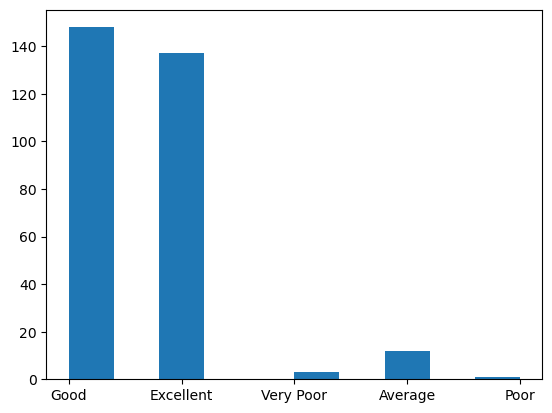

In [67]:
plt.hist(Films.Overall_Experience )
plt.show()

## What factors are linked to satisfaction?

In [68]:
related = []
for i in["Sinage","Parking","Clean","Age","Income"]:
    k=i
    
    print(" ")
    print(f"Checking for {k}:")
    print("#H0: s_chisquare = 0/nHa: s_chisquare<>0")
    j = pd.crosstab(Films[i] , Films['Overall'])
    pvalue = stats.chi2_contingency(j)[1]
    if pvalue<0.05:
        print("Rejected")
        related.append(k)
    else:
        print("Accepted")


 
Checking for Sinage:
#H0: s_chisquare = 0/nHa: s_chisquare<>0
Rejected
 
Checking for Parking:
#H0: s_chisquare = 0/nHa: s_chisquare<>0
Rejected
 
Checking for Clean:
#H0: s_chisquare = 0/nHa: s_chisquare<>0
Rejected
 
Checking for Age:
#H0: s_chisquare = 0/nHa: s_chisquare<>0
Accepted
 
Checking for Income:
#H0: s_chisquare = 0/nHa: s_chisquare<>0
Accepted


## What is the demographic profile of Film on the Rocks patrons?

In [69]:
Demo_profile = Films.loc[ : : , ['Gender','Marital_Status','Age','Income']]
Demo_profile

,Gender,Marital_Status,Age,Income
0,Female,Married,31-60,"Less than $50,000"
1,Female,Single,13-30,"Less than $50,000"
2,Male,Married,60+,"Less than $50,000"
3,Female,Married,60+,"Less than $50,000"
4,Female,Married,31-60,"$100,000+"
...,...,...,...,...
325,Female,Single,13-30,"Less than $50,000"
326,Male,Married,31-60,"$100,000+"
327,Female,Married,13-30,"$50 - $100,000"
328,Male,Married,13-30,"Less than $50,000"


In [70]:
Demo_profile.describe()

,Gender,Marital_Status,Age,Income
count,301,301,301,301
unique,2,3,4,3
top,Female,Single,13-30,"Less than $50,000"
freq,195,208,164,135


## In what media outlet(s) should the film series be advertised?

In [71]:
stats.mode(Films.Hear_About)

C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\1767759159.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(Films.Hear_About)
C:\Users\ifixthat\AppData\Local\Temp\ipykernel_2724\1767759159.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  stats.mode(Films.Hear_About)


ModeResult(mode=array(['word of mouth'], dtype=object), count=array([212]))

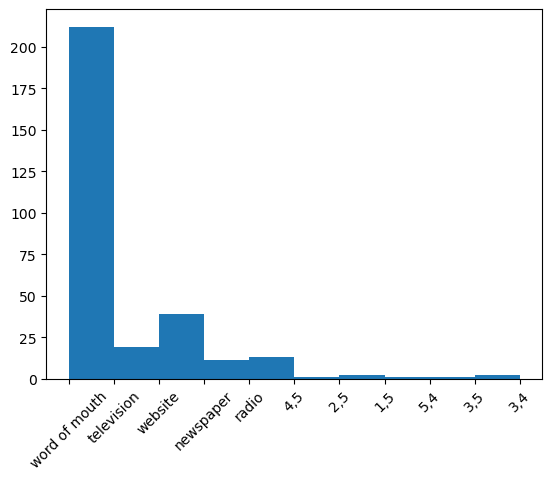

In [72]:
plt.hist(Films.Hear_About , orientation = 'vertical')
plt.xticks(rotation = 45)
plt.show()